# Analysis of Ford GoBike System Data
## by Muhammad Moustafa

## Investigation Overview

### The overall goal of this presentation is to illustrate the different factors affecting the trip duration length.


## Dataset Overview

### The dataset consists of 174952 record and 16 columns that contain info about the trip, start/end station, bike and user. each record describes an individual trip in Ford GoBike system.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("data.csv")
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df.bike_share_for_all_trip = (df.bike_share_for_all_trip == 'Yes')
df.dropna(inplace=True)
df = df[df.duration_sec < 2e3]
df['age'] = np.array(2019 - df.member_birth_year).astype(int)
df = df[df.age < 70]
df['start_time_weekday'] = df['start_time'].dt.day_name()
df['start_time_weekday'] = pd.Categorical(df.start_time_weekday, ordered=True,
                   categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
df['start_time_hour'] = df['start_time'].dt.hour
df['duration_min'] = df['duration_sec'] / 60
df['duration_hour'] = df['duration_sec'] / 3600

base_color = sb.color_palette()[0]

def get_bins(column, max_value=None, min_value=None, number_of_bins = 20):
    if not max_value:
        max_value = column.max()
    
    if not min_value:
        min_value = column.min()
    
    step = (max_value - min_value) / number_of_bins
    bins = np.arange(min_value, max_value+step, step)
    return bins

def get_column_key_value(column):
    return column.value_counts().keys(), column.value_counts()

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Members Age

### Most members are between 25 and 40 years old with mean = 34 years

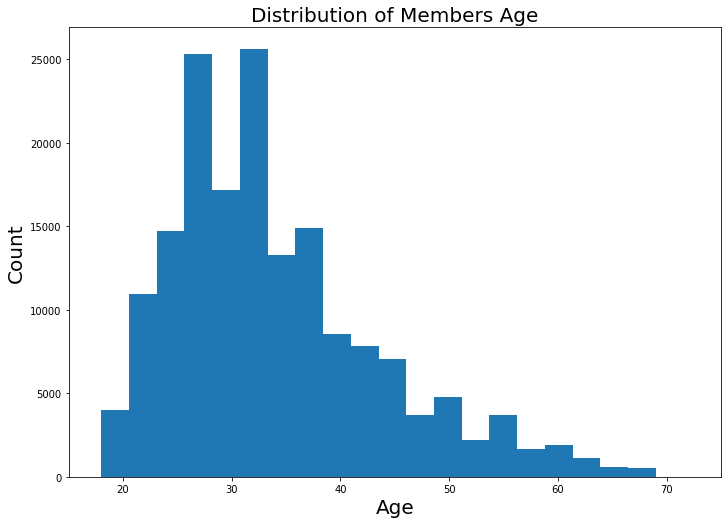

In [3]:
plt.figure(figsize=(11.69, 8.27))
plt.title('Distribution of Members Age', fontsize=20)
plt.hist(df.age, bins=get_bins(df.age));
plt.xlabel('Age', fontsize=20);
plt.ylabel('Count', fontsize=20);
plt.xlim(15,75);

## Effect of Gender and User type over Trip Duration


### In general, Customer do longer trips than Subsribers. Female do longer trips than males and others

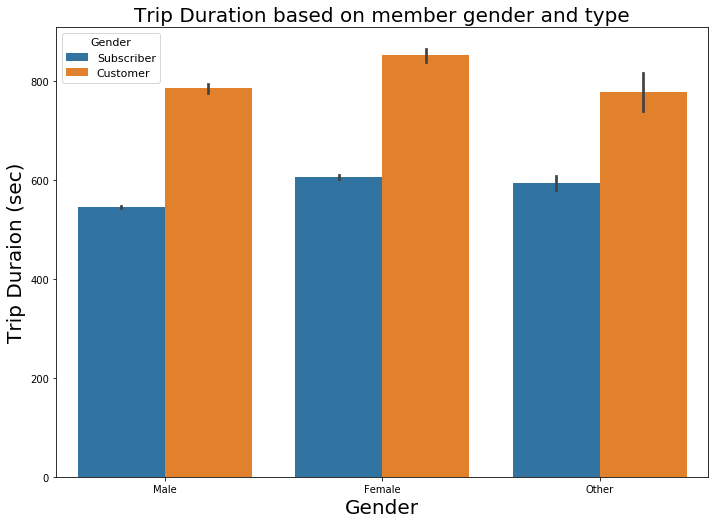

In [4]:
plt.figure(figsize=(11.69, 8.27))
sb.barplot(data = df, x = 'member_gender', y = 'duration_sec', hue = 'user_type');
plt.title('Trip Duration based on member gender and type', fontsize=20)
plt.ylabel('Trip Duraion (sec)', fontsize=20)
plt.xlabel('Gender', fontsize=20)
leg = plt.legend(prop={'size':11});
leg.set_title('Gender',  prop={'size':11});

## Effect of Start time over trip duration

### Although there are more trips happen between 7 am and 7 pm, this doesn't affec the trip duration
### The avergae trip duration is between 8 and 10 minutes 

##### Life Tip: If you go to or from work using Ford GoBike, going at 7 am instead of 8 am and leaving at 4 pm instead of 5 pm will increase your chance to find more bikes. 

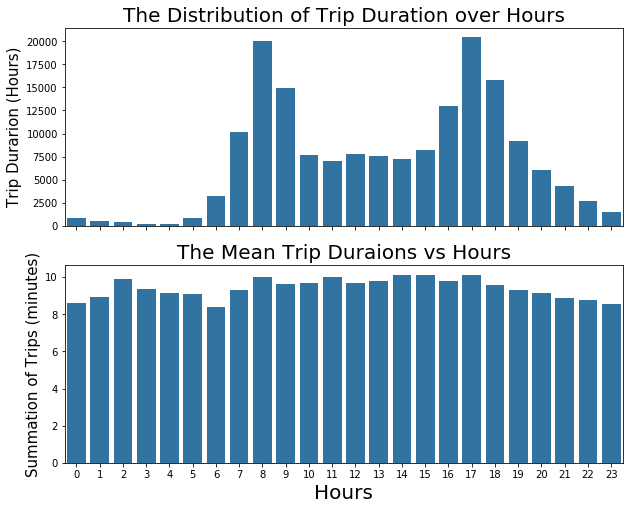

In [5]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10,8))
plt.sca(ax[0])
x, y = get_column_key_value(df.start_time.dt.hour)
sb.barplot(x=x, y=y, color=base_color);
plt.title("The Distribution of Trip Duration over Hours", fontsize=20)
plt.ylabel("Trip Durarion (Hours)", fontsize=15);

plt.sca(ax[1])
df_grouped_by_start_hour = df.groupby("start_time_hour").mean().reset_index()
sb.barplot(x=df_grouped_by_start_hour.start_time_hour, y=df_grouped_by_start_hour.duration_min, color=base_color);

plt.title("The Mean Trip Duraions vs Hours", fontsize=20)
plt.xlabel("Hours", fontsize=20);
plt.ylabel("Summation of Trips (minutes)", fontsize=15);

## Effect of Age over Trip durations

### Male Teenagers do the longer trip duration. yet as geeting older, females do longer trips than males

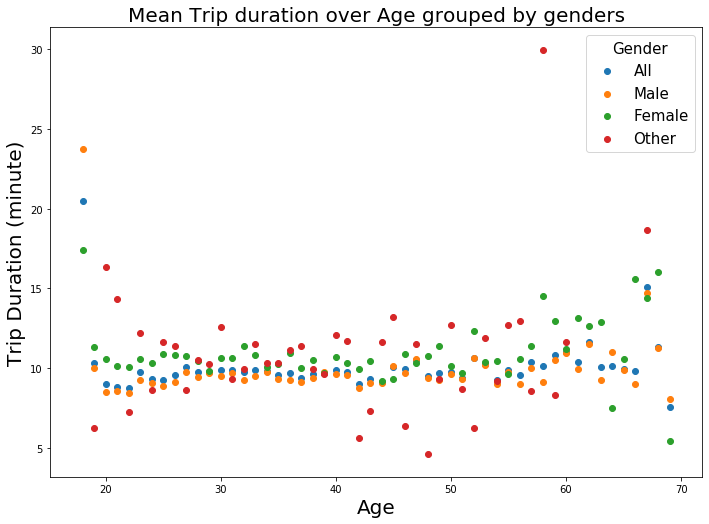

In [6]:
def scatter_plot_mean(df, x='age', y='duration_min', label=""):
    """
    function to scatter plot the mean 'y' 
    after grouping the dataframe by 'x'
    
    Arguments: 
    dataframe: onadas dataframe
    x: column to group dataframe by
    y: column to scatter plot its mean
    label: label to be added to the plot, help to create a clear legend
    """
    df_temp = df.groupby(x).mean().reset_index()
    plt.scatter(df_temp[x], df_temp[y], label=label);

# Split dataframe over genders
df_male = df[df.member_gender == 'Male']
df_female = df[df.member_gender == 'Female']
df_other = df[df.member_gender == 'Other']

# Create new figure
plt.figure(figsize=(11.69, 8.27));

# Plot scatter plots
scatter_plot_mean(df, label='All')
scatter_plot_mean(df_male, label='Male')
scatter_plot_mean(df_female, label='Female')
scatter_plot_mean(df_other, label='Other')

# Ploishing the figure
plt.title('Mean Trip duration over Age grouped by genders', fontsize=20)
plt.ylabel('Age', fontsize=20);
plt.ylabel('Trip Duration (minute)', fontsize=20);
plt.xlabel('Age', fontsize=20);
leg = plt.legend(prop={'size':15});
leg.set_title('Gender',  prop={'size':15});

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!